**Importing Libraries**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from scipy.sparse import dok_matrix
from scipy.sparse import csr_matrix

**Furniture Data**

In [6]:
furniture_data = pd.read_csv("./furniture_dataset/innodeco_clean.csv")
furniture_data.head()

,Product_ID,Product_Name,Category,Product_URL,Product_Color,Product_Type
0,20542290,"linnefors-2-seat sofa-bed section, remmarn gre...",Living room,https://www.ikea.com.hk/dairyfarm/hk/images/15...,grey,sofa
1,80361494,"hammarn-sofa-bed, knisa dark grey/black-80361494",Living room,https://www.ikea.com.hk/dairyfarm/hk/images/19...,black,sofa
2,30341149,"friheten-three-seat sofa-bed, skiftebo dark gr...",Living room,https://www.ikea.com.hk/dairyfarm/hk/images/25...,grey,sofa
3,9216755,"friheten-corner sofa-bed with storage, skifteb...",Living room,https://www.ikea.com.hk/dairyfarm/hk/images/75...,grey,sofa
4,29216820,"friheten-corner sofa-bed with storage, bomstad...",Living room,https://www.ikea.com.hk/dairyfarm/hk/images/48...,black,sofa


In [7]:
furniture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     8155 non-null   int64 
 1   Product_Name   8155 non-null   object
 2   Category       8155 non-null   object
 3   Product_URL    8155 non-null   object
 4   Product_Color  7170 non-null   object
 5   Product_Type   7426 non-null   object
dtypes: int64(1), object(5)
memory usage: 382.4+ KB


In [8]:
#.shape is an attribute that returns the dimensions of the DataFrame or array.
furniture_data.shape

(8155, 6)

**Users Data**

In [11]:
users_data= pd.read_csv('./Users_dataset/innoDecoUsers.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",31.0
1,2,"stockton, california, usa",25.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",27.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   299 non-null    int64  
 1   Location  299 non-null    object 
 2   Age       184 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB


In [15]:
users_data.shape

(299, 3)

**Favorite Data**

In [16]:
favorite_data = pd.read_csv("./Favorite_dataset/innoDecoFavorites.csv")
favorite_data.head()

,User-ID,Product_ID,Product_Favorite
0,11,19470232,1
1,11,89516934,1
2,11,60541590,1
3,11,50541595,1
4,11,89491231,1


In [17]:
favorite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   User-ID           190 non-null    int64
 1   Product_ID        190 non-null    int64
 2   Product_Favorite  190 non-null    int64
dtypes: int64(3)
memory usage: 4.6 KB


In [18]:
favorite_data.shape

(190, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

## Let's take first furniture_data dataset

In [20]:
furniture_data.drop(['Product_URL'], axis= 1, inplace= True)

In [21]:
# replacing '-' with '_' and features name in lower case
furniture_data.columns= furniture_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
favorite_data.columns= favorite_data.columns.str.strip().str.lower().str.replace('-', '_')

In [22]:
pd.set_option('display.max_colwidth', None)

In [23]:
furniture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     8155 non-null   int64 
 1   product_name   8155 non-null   object
 2   category       8155 non-null   object
 3   product_color  7170 non-null   object
 4   product_type   7426 non-null   object
dtypes: int64(1), object(4)
memory usage: 318.7+ KB


In [24]:
print(furniture_data.isnull().sum())

product_id         0
product_name       0
category           0
product_color    985
product_type     729
dtype: int64


In [25]:
# nan values in particular column
furniture_data.loc[(furniture_data['product_name'].isnull()),: ]

,product_id,product_name,category,product_color,product_type


In [26]:
# nan values in particular column
furniture_data.loc[(furniture_data['category'].isnull()),: ]

,product_id,product_name,category,product_color,product_type


In [27]:
# nan values in particular column
furniture_data.loc[(furniture_data['product_color'].isnull()),: ]

,product_id,product_name,category,product_color,product_type
31,20513768,"klagshamn-mattress pad, 140x200 cm-20513768",Living room,NaN,mattress
72,49536552,"grönlid-3-seat sofa-bed with chaise longue, ljungen light green-49536552",Living room,NaN,sofa
75,69536669,"grönlid-3-seat sofa-bed, sporda natural-69536669",Living room,NaN,sofa
79,89536593,"grönlid-3-seat sofa-bed, ljungen light green-89536593",Living room,NaN,sofa
80,79536683,"grönlid-3-seat sofa-bed with chaise longue, sporda natural-79536683",Living room,NaN,sofa
...,...,...,...,...,...
8121,80571939,"solvinden-led lighting chain with 12 lights, outdoor/battery-operated yellow-80571939",Lighting and Home electronics,NaN,led
8123,40571875,"solvinden-led table lamp, battery-operated/outdoor, 24 cm-40571875",Lighting and Home electronics,NaN,table
8125,70571826,"solvinden-led pendant lamp, outdoor/oval, 37 cm-70571826",Lighting and Home electronics,NaN,led
8129,571863,"solvinden-led floor lamp, battery-operated/outdoor, 35 cm-571863",Lighting and Home electronics,NaN,led


In [28]:
# nan values in particular column
furniture_data.loc[(furniture_data['product_type'].isnull()),: ]

,product_id,product_name,category,product_color,product_type
140,59305626,"söderhamn-corner section, viarp beige/brown-59305626",Living room,beige,NaN
264,39449678,"söderhamn-corner section, fridtuna light beige-39449678",Living room,beige,NaN
282,79452089,"söderhamn-corner section, tonerud grey-79452089",Living room,grey,NaN
329,99449604,"söderhamn-corner section, fridtuna dark grey-99449604",Living room,grey,NaN
332,19514523,"söderhamn-corner section, kelinge grey-turquoise-19514523",Living room,grey-turquoise,NaN
...,...,...,...,...,...
7967,70466364,"skaftet-cord set, textile nickel-plated, 1.4 m-70466364",Lighting and Home electronics,NaN,NaN
7973,90420129,"sunneby-cord set, black textile, 1.8 m-90420129",Lighting and Home electronics,black,NaN
7974,20420175,"sunneby-cord set, white textile, 1.8 m-20420175",Lighting and Home electronics,white,NaN
8086,20325772,"höljes-pendant downlighter, white, 25 cm-20325772",Lighting and Home electronics,white,NaN


In [29]:
# getting unique value from 'product_color' feature
furniture_data['product_color'].unique()

array(['grey', 'black', 'beige', 'blue', 'anthracite', 'white',
       'grey-turquoise', nan, 'red', 'brown', 'dark green', 'orange',
       'blue-green'], dtype=object)

In [30]:
# getting unique value from 'product_type' feature
furniture_data['product_type'].unique()

array(['sofa', 'mattress', ' chair', 'footstool', 'compact', nan,
       'recliner', 'pouffe', 'bench', 'headrest', 'cushion', 'stool',
       'armrest', 'storage_items_case', 'bed frame', 'bed', 'bar stool',
       'seat', 'underframe', 'table', 'bed_slatted', 'bracket',
       'wall shelf', 'shelf', 'TV storage', 'storage', 'top panel',
       'cabinet', 'bookcase', 'door_mat', 'wardrobe', 'shelving unit',
       'desk combination', 'shelf sections', 'laundry', 'shelfs/door',
       'towel_rail', 'enhet-wall', 'mirror', 'countertop', ' washbasin',
       'frame', 'rail', 'wash-stand', 'guard rail', 'sideboard',
       'bathroom set', 'basket', 'bathtub mat', 'box for tissues',
       'ceiling lamp', 'wall lamp', 'container', ' wireless control',
       'hanger for door', 'hook', 'led wall lamp', 'mug', 'shower mat',
       'soap dispenser', 'toilet_brush_roll', 'toothbrush holder', 'box',
       'mesh storage box', ' chest of drawers', 'top and plinth',
       'laptop stand', 'kitche

In [31]:
# getting unique value from 'category' feature
furniture_data['category'].unique()

array(['Living room', 'Bedroom', 'Childrens', 'Kitchen', 'Home textiles',
       'Workspace', 'Store and organise furniture', 'Bathroom and Water',
       'Lighting and Home electronics', 'Storage', 'Decoration', 'Rugs',
       'Cooking', 'Outdoor'], dtype=object)

In [32]:
# Handle missing values in 'product_name' and 'category'
furniture_data.loc[furniture_data['product_name'].isnull(), 'product_name'] = 'No Mention'
furniture_data.loc[furniture_data['category'].isnull(), 'category'] = 'No Mention'
furniture_data.loc[furniture_data['product_type'].isnull(), 'product_type'] = 'No Mention'
furniture_data.loc[furniture_data['product_color'].isnull(), 'product_color'] = 'No Mention'

In [33]:
furniture_data[furniture_data['product_name'] == 'No Mention']

,product_id,product_name,category,product_color,product_type


In [34]:
furniture_data[furniture_data['category'] == 'No Mention']

,product_id,product_name,category,product_color,product_type


In [35]:
furniture_data[furniture_data['product_type'] == 'No Mention']

,product_id,product_name,category,product_color,product_type
140,59305626,"söderhamn-corner section, viarp beige/brown-59305626",Living room,beige,No Mention
264,39449678,"söderhamn-corner section, fridtuna light beige-39449678",Living room,beige,No Mention
282,79452089,"söderhamn-corner section, tonerud grey-79452089",Living room,grey,No Mention
329,99449604,"söderhamn-corner section, fridtuna dark grey-99449604",Living room,grey,No Mention
332,19514523,"söderhamn-corner section, kelinge grey-turquoise-19514523",Living room,grey-turquoise,No Mention
...,...,...,...,...,...
7967,70466364,"skaftet-cord set, textile nickel-plated, 1.4 m-70466364",Lighting and Home electronics,No Mention,No Mention
7973,90420129,"sunneby-cord set, black textile, 1.8 m-90420129",Lighting and Home electronics,black,No Mention
7974,20420175,"sunneby-cord set, white textile, 1.8 m-20420175",Lighting and Home electronics,white,No Mention
8086,20325772,"höljes-pendant downlighter, white, 25 cm-20325772",Lighting and Home electronics,white,No Mention


In [36]:
furniture_data[furniture_data['product_color'] == 'No Mention']

,product_id,product_name,category,product_color,product_type
31,20513768,"klagshamn-mattress pad, 140x200 cm-20513768",Living room,No Mention,mattress
72,49536552,"grönlid-3-seat sofa-bed with chaise longue, ljungen light green-49536552",Living room,No Mention,sofa
75,69536669,"grönlid-3-seat sofa-bed, sporda natural-69536669",Living room,No Mention,sofa
79,89536593,"grönlid-3-seat sofa-bed, ljungen light green-89536593",Living room,No Mention,sofa
80,79536683,"grönlid-3-seat sofa-bed with chaise longue, sporda natural-79536683",Living room,No Mention,sofa
...,...,...,...,...,...
8121,80571939,"solvinden-led lighting chain with 12 lights, outdoor/battery-operated yellow-80571939",Lighting and Home electronics,No Mention,led
8123,40571875,"solvinden-led table lamp, battery-operated/outdoor, 24 cm-40571875",Lighting and Home electronics,No Mention,table
8125,70571826,"solvinden-led pendant lamp, outdoor/oval, 37 cm-70571826",Lighting and Home electronics,No Mention,led
8129,571863,"solvinden-led floor lamp, battery-operated/outdoor, 35 cm-571863",Lighting and Home electronics,No Mention,led


## Let's see now user_data dataset

In [37]:
# users_data size
print(users_data.shape)

(299, 3)


In [38]:
# unique value in age
users_data['age'].unique()

array([31., 25., nan, 27., 61., 26., 23., 17., 19., 46., 32., 24., 20.,
       34., 51., 21., 41., 30., 38., 43., 44., 37., 28., 50., 42., 40.,
       39., 35., 53., 47., 36., 57., 13., 58., 49., 45., 62., 63., 33.,
       29., 66., 15., 60., 54.,  0., 79., 22., 16., 65.])

In [39]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [40]:
users_data['age'].unique()

array([31.        , 25.        , 30.89673913, 27.        , 61.        ,
       26.        , 23.        , 17.        , 19.        , 46.        ,
       32.        , 24.        , 20.        , 34.        , 51.        ,
       21.        , 41.        , 30.        , 38.        , 43.        ,
       44.        , 37.        , 28.        , 50.        , 42.        ,
       40.        , 39.        , 35.        , 53.        , 47.        ,
       36.        , 57.        , 13.        , 58.        , 49.        ,
       45.        , 62.        , 63.        , 33.        , 29.        ,
       66.        , 15.        , 60.        , 54.        ,  0.        ,
       79.        , 22.        , 16.        , 65.        ])

In [41]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [43]:
users_data['age'].unique()

array([31.        , 25.        , 30.89673913, 27.        , 61.        ,
       26.        , 23.        , 17.        , 19.        , 46.        ,
       32.        , 24.        , 20.        , 34.        , 51.        ,
       21.        , 41.        , 30.        , 38.        , 43.        ,
       44.        , 37.        , 28.        , 50.        , 42.        ,
       40.        , 39.        , 35.        , 53.        , 47.        ,
       36.        , 57.        , 13.        , 58.        , 49.        ,
       45.        , 62.        , 63.        , 33.        , 29.        ,
       66.        , 15.        , 60.        , 54.        , 31.00041946,
       79.        , 22.        , 16.        , 65.        ])

As we can see above we don't have any null values for age.

## Now let's take Favorites_data dataset

In [44]:
favorite_data.head()

,user_id,product_id,product_favorite
0,11,19470232,1
1,11,89516934,1
2,11,60541590,1
3,11,50541595,1
4,11,89491231,1


In [45]:
# finding unique product_id from favorite and furniture dataset
unique_favorites = favorite_data[favorite_data.product_id.isin(furniture_data.product_id)]
unique_favorites

,user_id,product_id,product_favorite
0,11,19470232,1
1,11,89516934,1
2,11,60541590,1
3,11,50541595,1
4,11,89491231,1
...,...,...,...
185,264,10427295,1
186,264,60427306,1
187,264,10427295,1
188,264,60459123,0


In [46]:
print(favorite_data.shape)
print(unique_favorites.shape)

(190, 3)
(189, 3)


In [48]:
# unique ratings from 'product_favorite' feature
unique_favorites['product_favorite'].unique()

array([1, 0], dtype=int64)

# Data Visualizations

## furniture_data dataset

**Analysis no. 1** - 

Which are the top 20 categories with the number of products ?

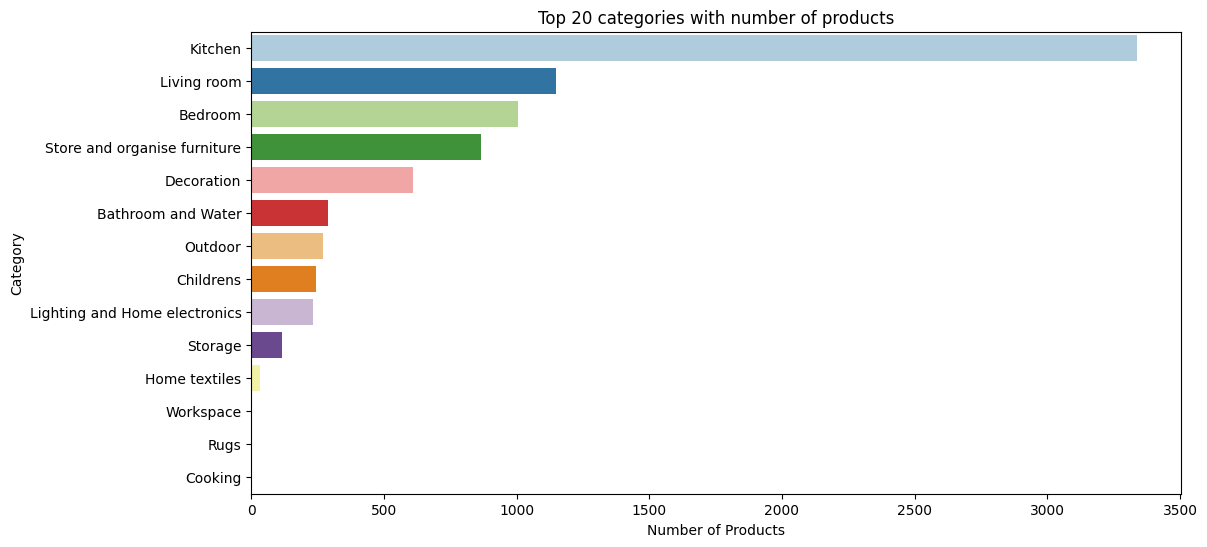

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(y="category", palette='Paired', data=furniture_data, order=furniture_data['category'].value_counts().index[0:20])
plt.title("Top 20 categories with number of products")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

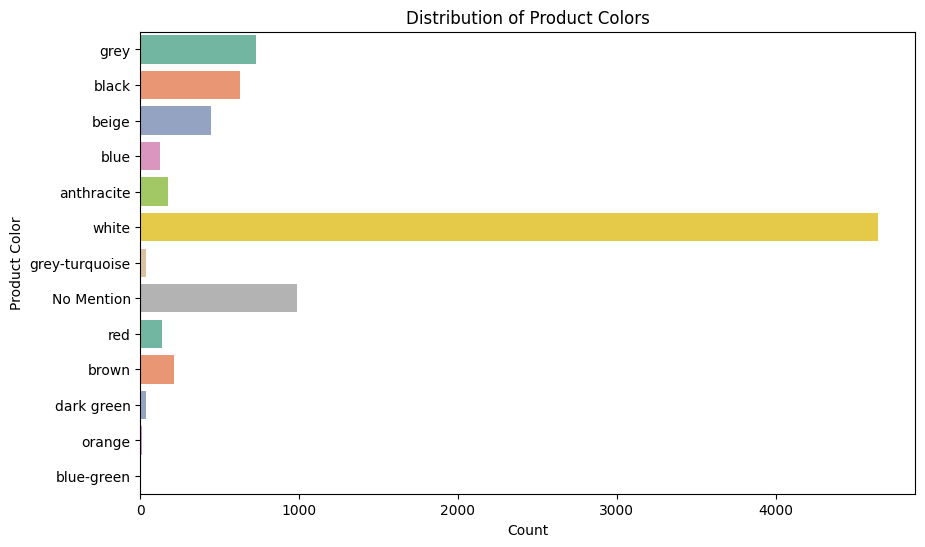

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(y="product_color", palette='Set2', data=furniture_data)
plt.title("Distribution of Product Colors")
plt.xlabel("Count")
plt.ylabel("Product Color")
plt.show()


Text(0.5, 1.0, 'Distribution of Category by Product Types')

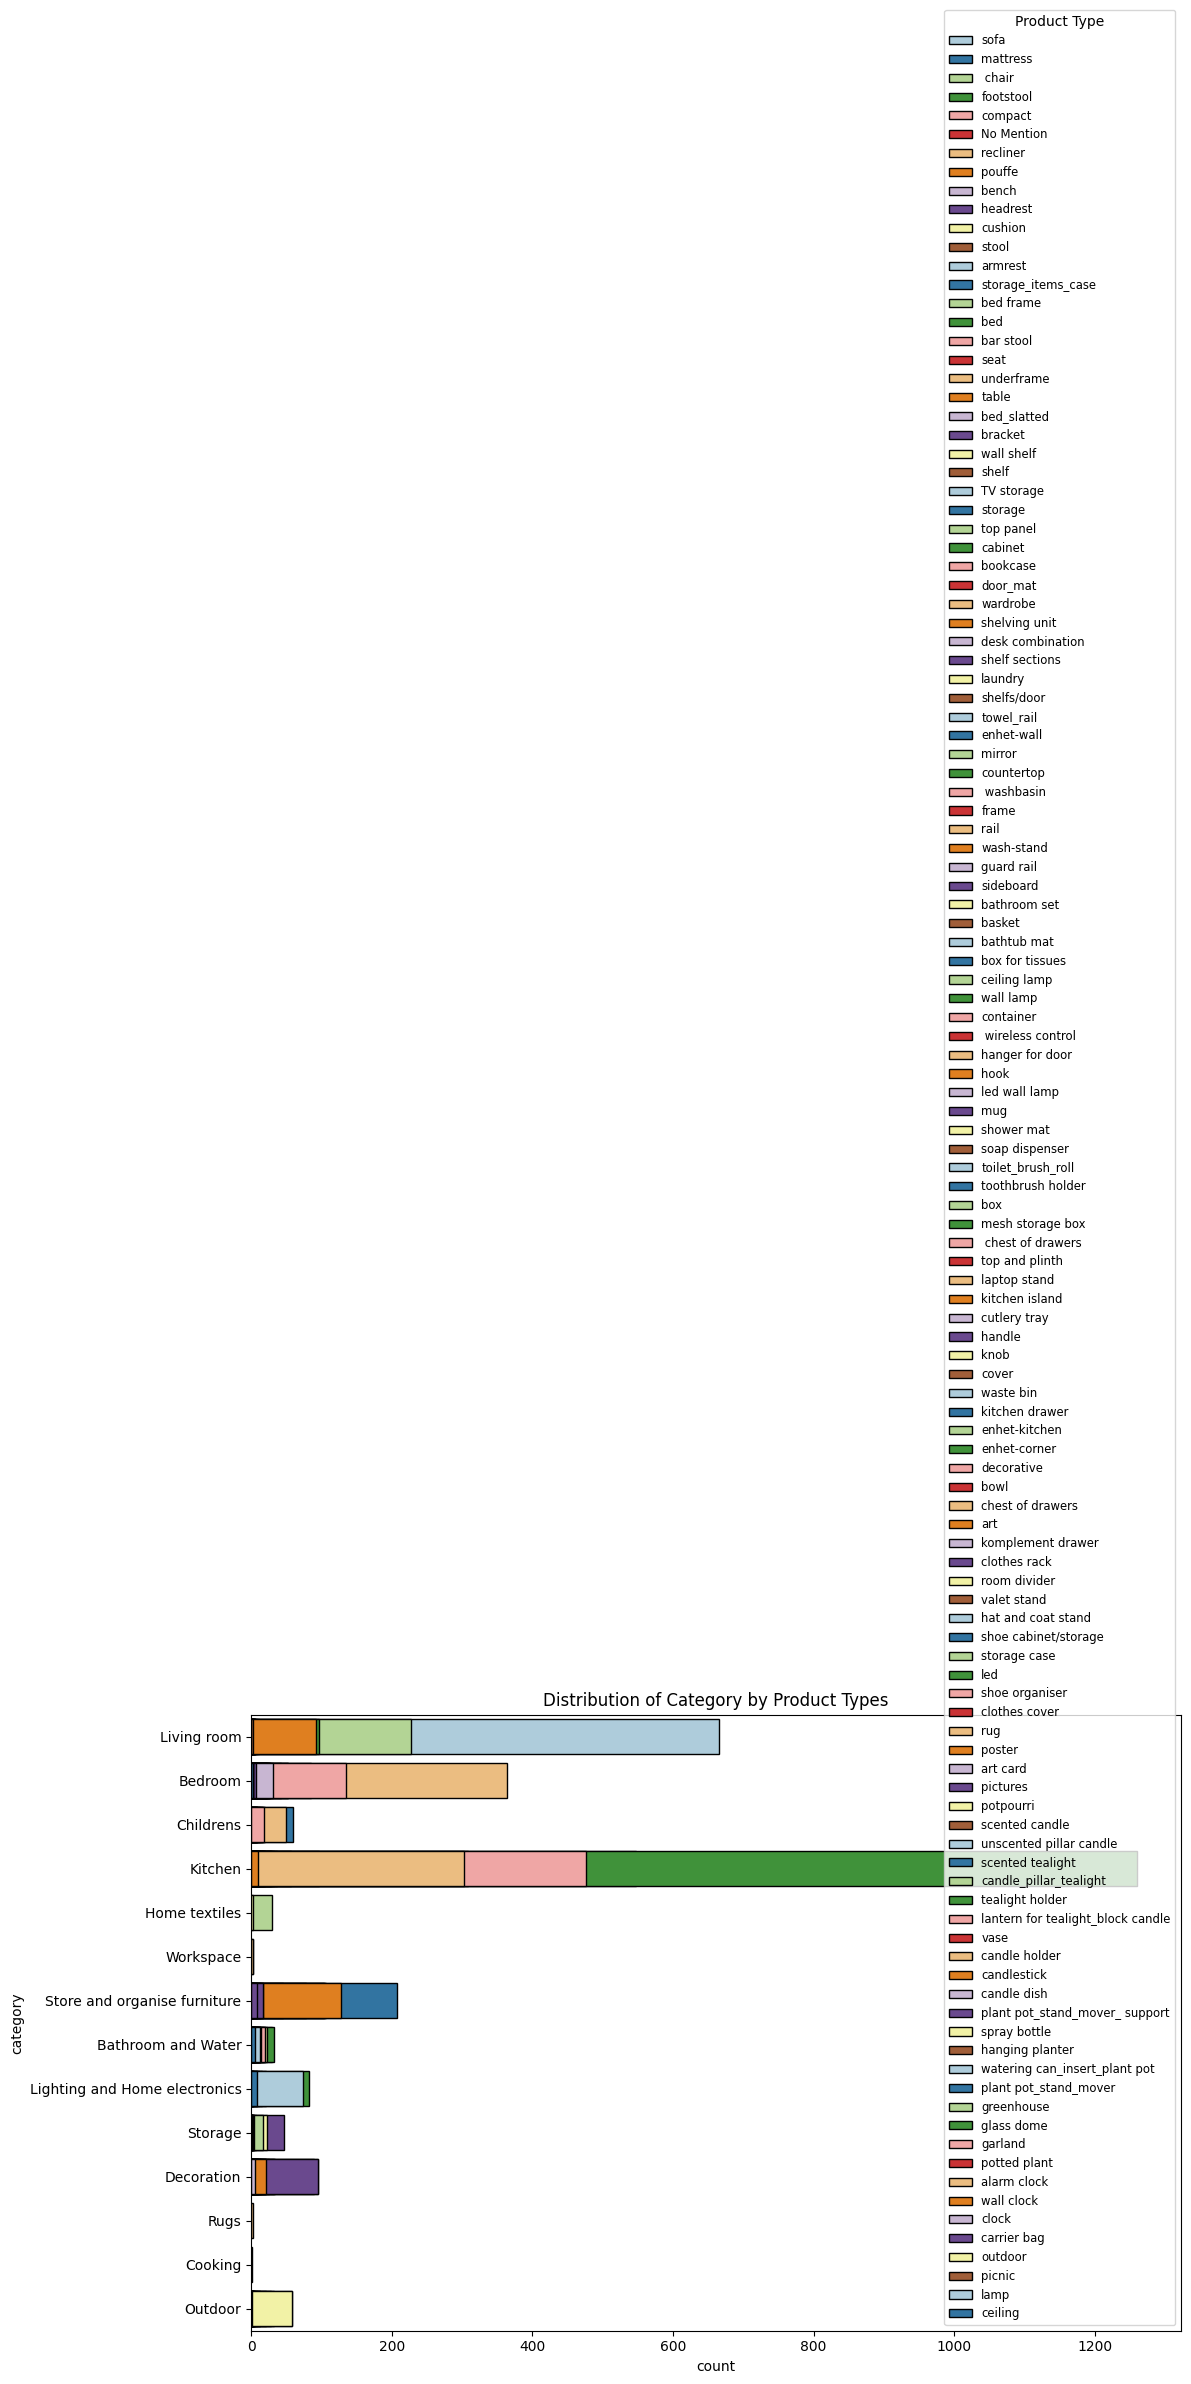

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(y="category", hue="product_type", palette='Paired', data=furniture_data, 
              dodge=False, hue_order=furniture_data['product_type'].unique(), 
              edgecolor='black')

# Adding legend and title
plt.legend(title="Product Type", loc="lower right", fontsize='small')
plt.title("Distribution of Category by Product Types")

Text(0.5, 1.0, 'Distribution of Category by Color')

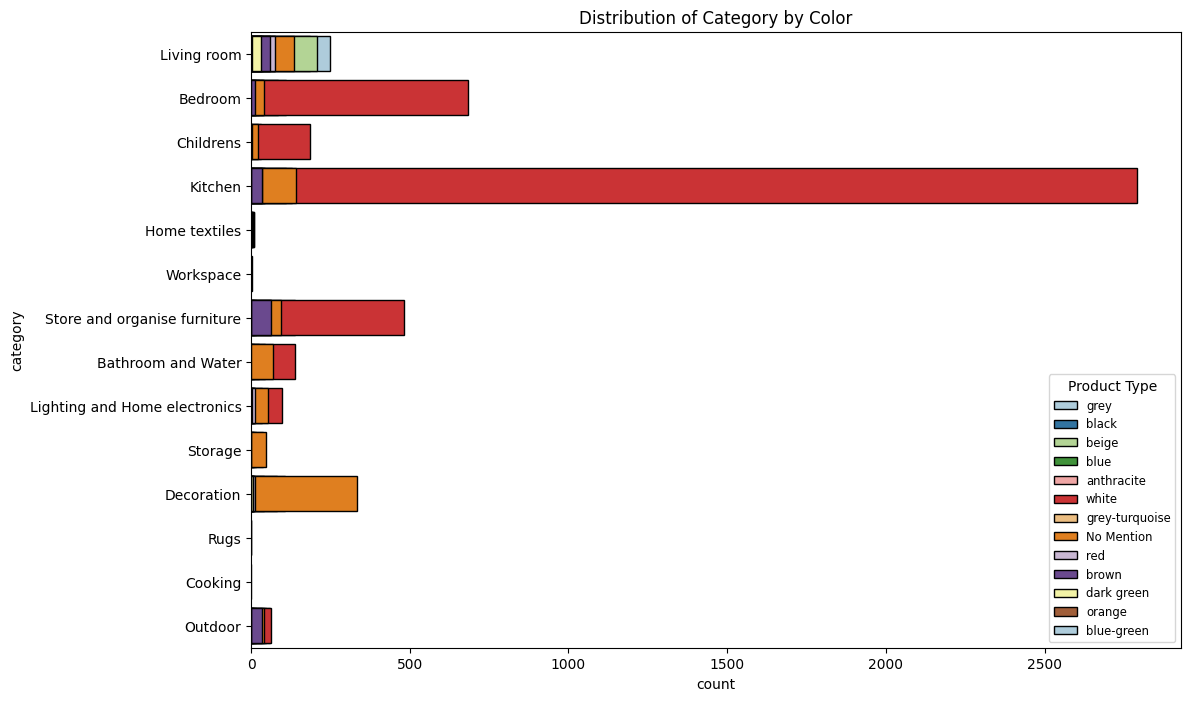

In [52]:
plt.figure(figsize=(12, 8))
sns.countplot(y="category", hue="product_color", palette='Paired', data=furniture_data, 
              dodge=False, hue_order=furniture_data['product_color'].unique(), 
              edgecolor='black')

# Adding legend and title
plt.legend(title="Product Type", loc="lower right", fontsize='small')
plt.title("Distribution of Category by Color")

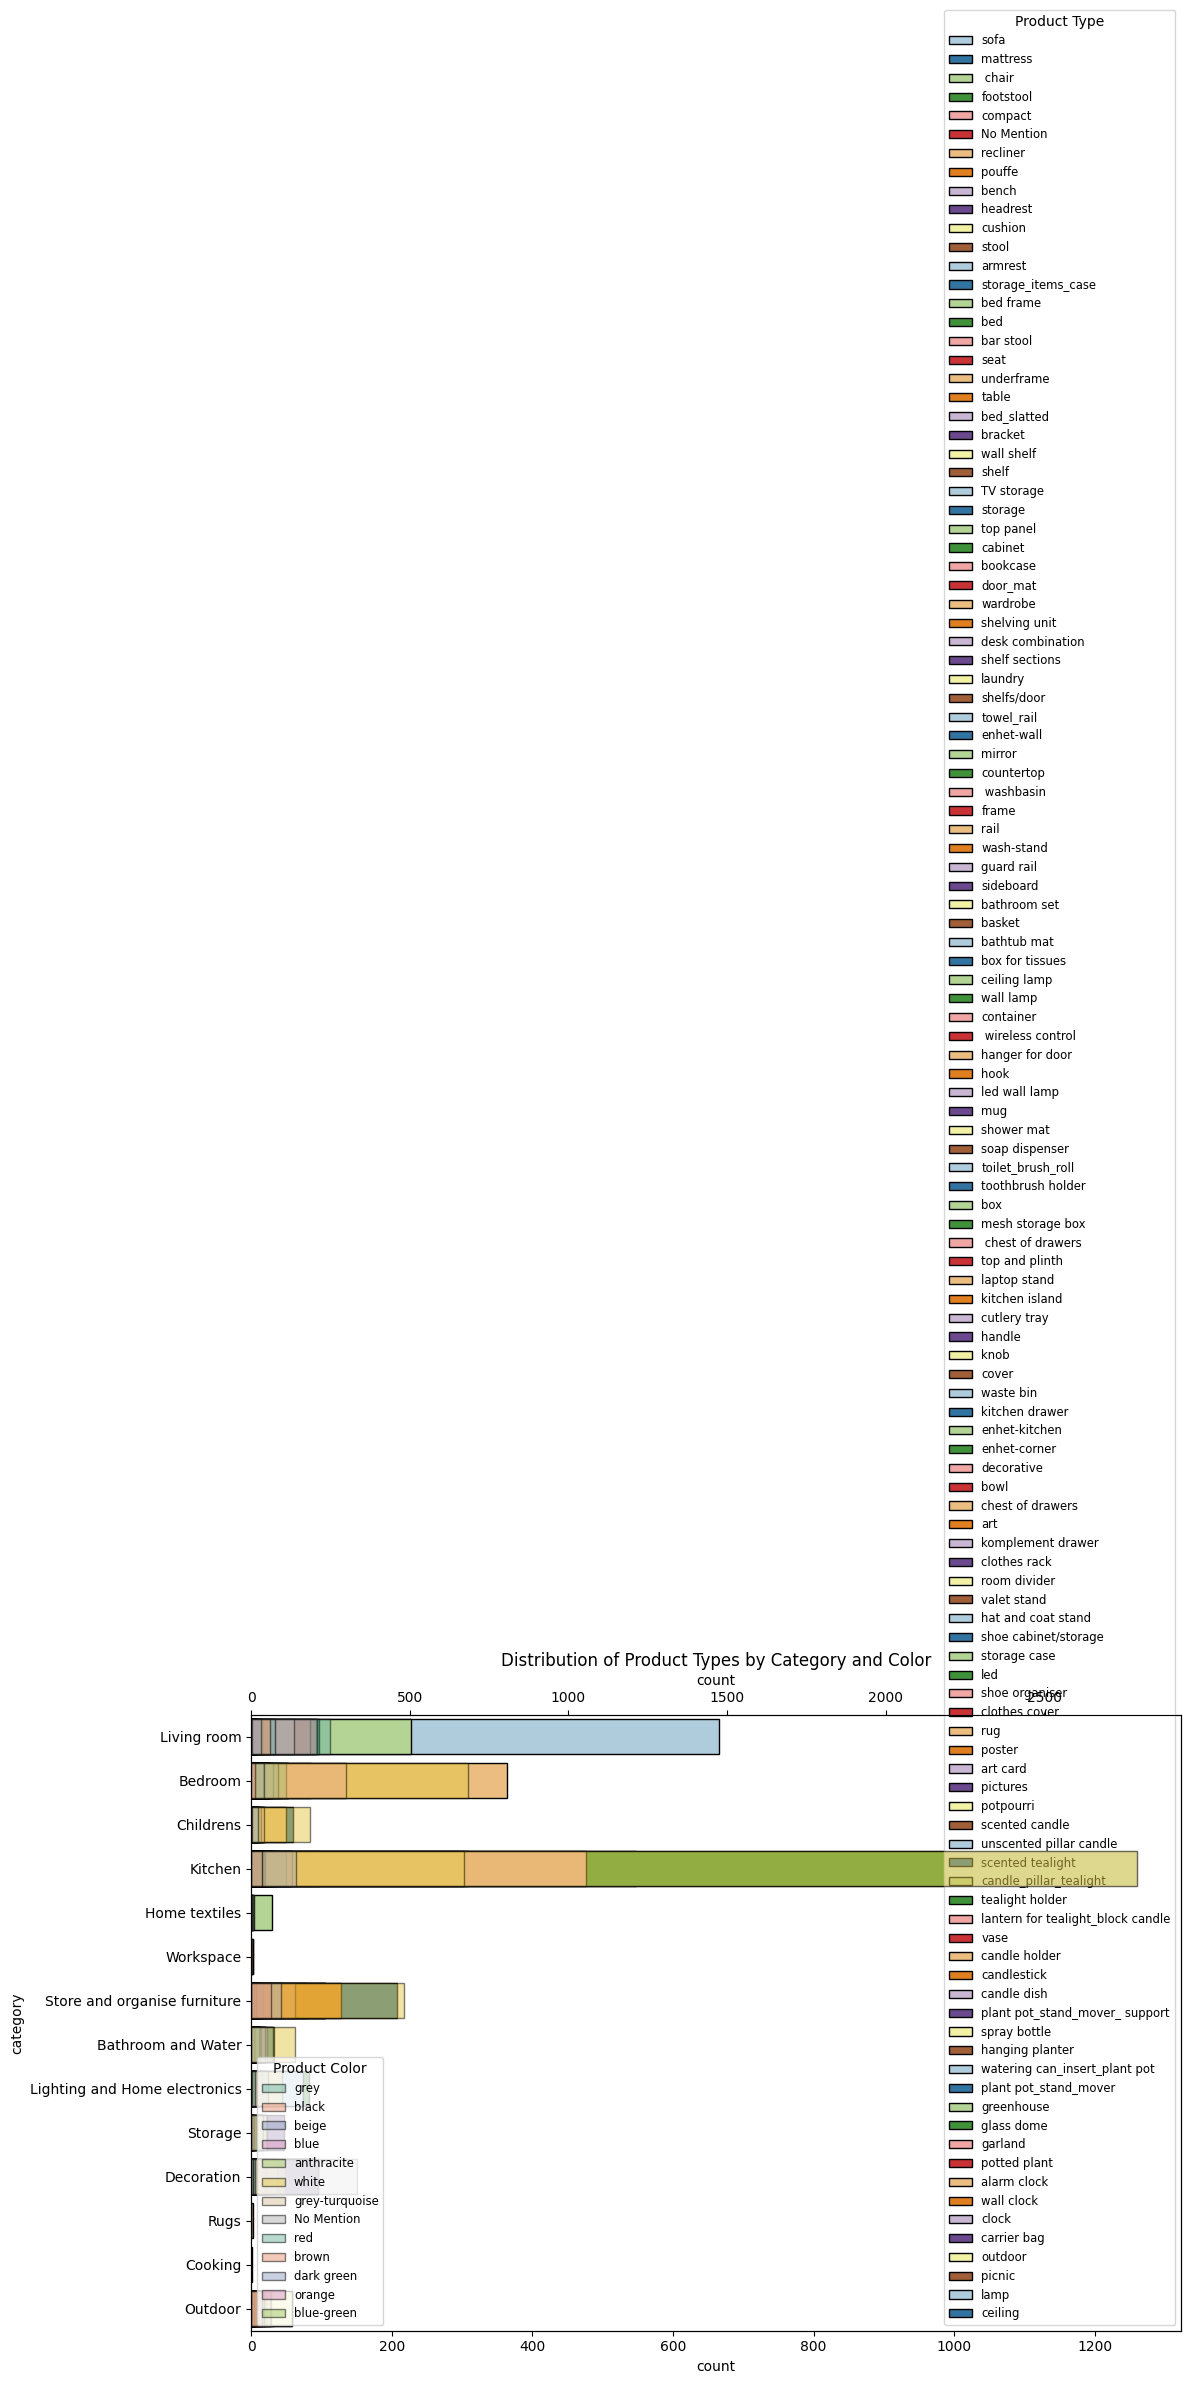

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(y="category", hue="product_type", palette='Paired', data=furniture_data, 
              dodge=False, hue_order=furniture_data['product_type'].unique(), 
              edgecolor='black')

# Adding legend and title
plt.legend(title="Product Type", loc="lower right", fontsize='small')
plt.title("Distribution of Product Types by Category and Color")

# Adding second x-axis for Product_Color
ax2 = plt.twiny()
sns.countplot(y="category", hue="product_color", palette='Set2', data=furniture_data, 
              dodge=False, hue_order=furniture_data['product_color'].unique(), 
              ax=ax2, edgecolor='black', alpha=0.5)

# Adjusting legend for Product_Color
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=labels, title="Product Color", loc="lower left", fontsize='small')

plt.show()

## User_data Dataset

**Analysis no.4** -

Age distributions of users_data

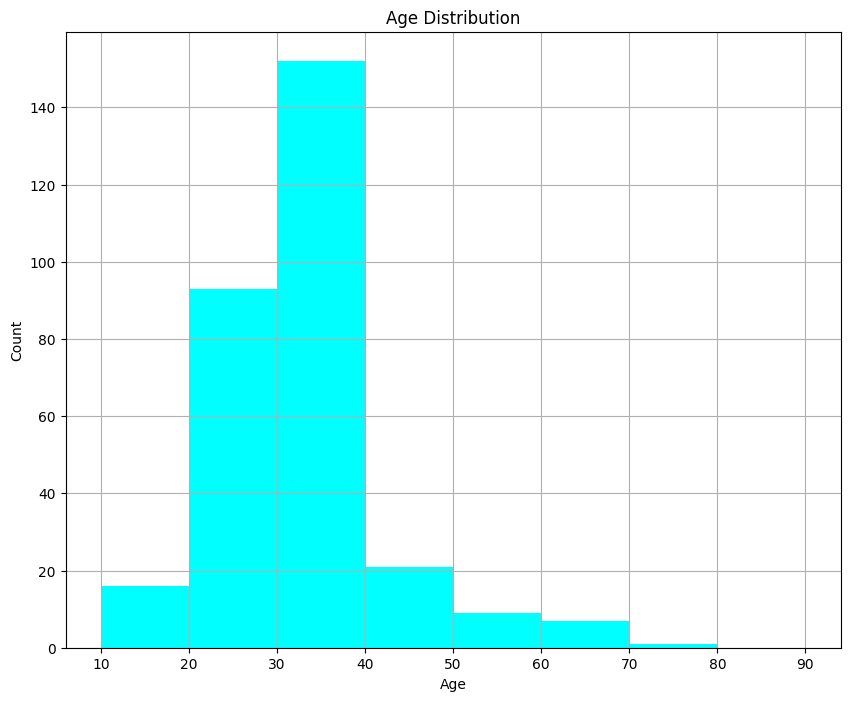

In [54]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Favorite_data Dataset

**Analysis No. 5**

What are top 20 category as per number of favorite ? 

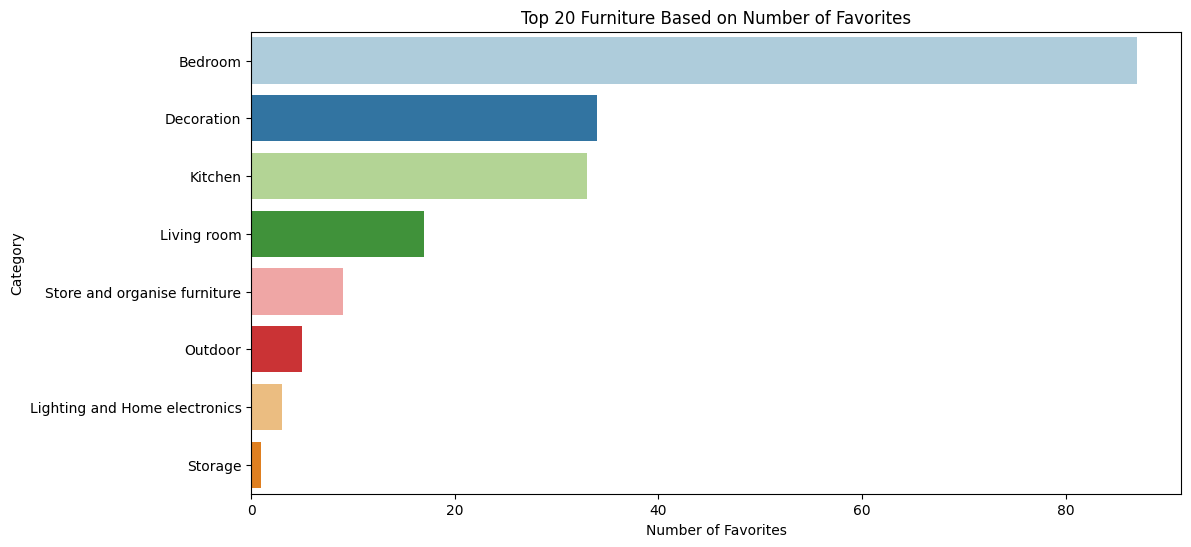

In [55]:
# Merge the datasets based on Product_ID
merged_data = pd.merge(furniture_data, favorite_data, on="product_id")

# Count the number of favorites for each product
favorites_count = merged_data['category'].value_counts()

# Extract the top 20 products with the most favorites
top_20_products = favorites_count.head(10)

# Plot the top 20 products based on the number of favorites
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_products.values, y=top_20_products.index, palette='Paired')
plt.title("Top 20 Furniture Based on Number of Favorites")
plt.xlabel("Number of Favorites")
plt.ylabel("Category")
plt.show()

<Axes: xlabel='product_favorite', ylabel='count'>

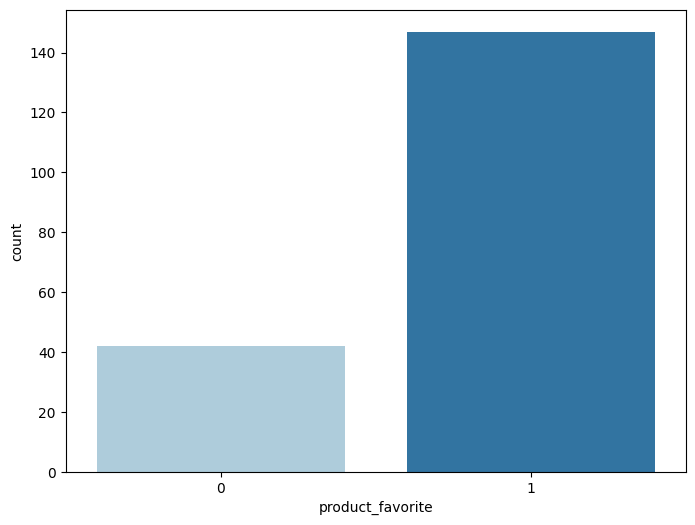

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x="product_favorite",palette = 'Paired',data= unique_favorites)

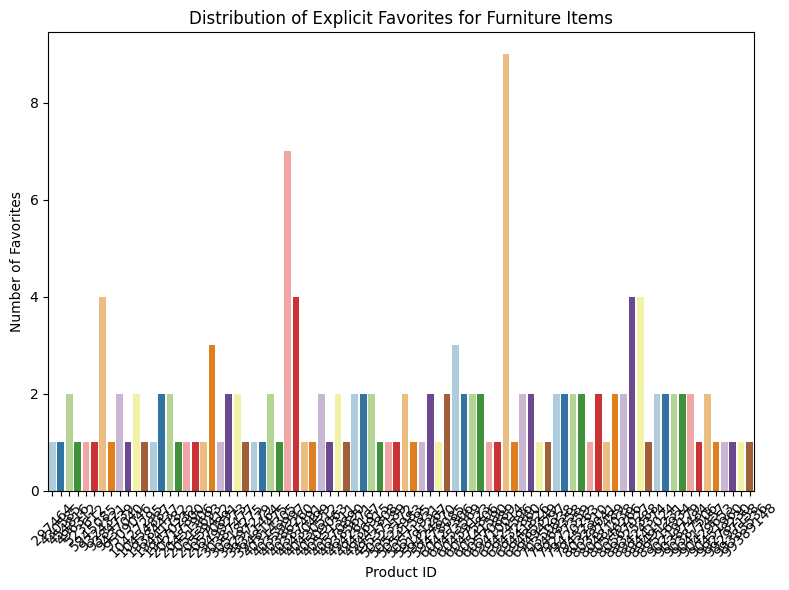

In [57]:
# Filter out unfavorite items (Product_Favorite == 0)
explicit_favorites = favorite_data[favorite_data['product_favorite'] == 1]

# Create a countplot to visualize the distribution of explicit favorites
plt.figure(figsize=(8, 6))
sns.countplot(x='product_id', palette='Paired', data=explicit_favorites)
plt.title("Distribution of Explicit Favorites for Furniture Items")
plt.xlabel("Product ID")
plt.ylabel("Number of Favorites")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recommendation System

Now let's try to build recommendation system based on popularity (i.e favoriting). This recommendations are usually given to every user irrespective of personal characterization.

In [58]:
# Separate explicit and implicit favorites
explicit_favorites = favorite_data[favorite_data['product_favorite'] == 1]
implicit_favorites = favorite_data[favorite_data['product_favorite'] == 0]

In [59]:
explicit_favorites.head()

,user_id,product_id,product_favorite
0,11,19470232,1
1,11,89516934,1
2,11,60541590,1
3,11,50541595,1
4,11,89491231,1


In [60]:
print(unique_favorites.shape)
print(explicit_favorites.shape)

(189, 3)
(148, 3)


Merging furniture_data dataset and favorite_explicit. Considering product-id that were explicitely favorite for this recommendation system.

In [61]:
# Merging furniture_data dataset and explicit_favorites
new_favorite_df= pd.merge(furniture_data, explicit_favorites, on='product_id')
new_favorite_df.head()

,product_id,product_name,category,product_color,product_type,user_id,product_favorite
0,99389148,"pärup-2-seat sofa-bed, gunnared beige-99389148",Living room,beige,sofa,11,1
1,19470232,"kivik-1-seat sofa-bed, tibbleby beige/grey-19470232",Living room,beige,sofa,11,1
2,19470232,"kivik-1-seat sofa-bed, tibbleby beige/grey-19470232",Living room,beige,sofa,97,1
3,89516934,"holmsund-3-seat sofa bed, borgunda beige-89516934",Living room,beige,sofa,11,1
4,89516934,"holmsund-3-seat sofa bed, borgunda beige-89516934",Living room,beige,sofa,97,1


In [62]:
print(new_favorite_df.shape)

(147, 7)


In [63]:
new_favorite_df['category'].count()

147

In [64]:
new_favorite_df['category'].nunique()

7

So we've 7 number of unique values in category columns.

## Let's take top 10 recommendation furniture category

In [65]:
# top ten category as per category favorite and recommendation
top_ten_furniture= pd.DataFrame(new_favorite_df.groupby('category')['product_favorite'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten furniture as per favorite : ')
top_ten_furniture

The top ten furniture as per favorite : 


,product_favorite
category,
Bedroom,76
Kitchen,24
Decoration,23
Living room,13
Store and organise furniture,7
Lighting and Home electronics,2
Outdoor,2


# Memory-Based Collaborative Filtering

This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach).


## Train - Test Split

In [66]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_favorite_df, test_size=0.20)

In [67]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 117
Testing set lengths: 30
Test set is 20% of the full dataset.


In [68]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.product_id.unique()  
train_data_furnitur2idx = {o:i for i, o in enumerate(i_unique_train)}

In [71]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.product_id.unique() 
test_data_furniture2idx = {o:i for i, o in enumerate(i_unique_test)}

In [72]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['product_id'].map(train_data_furnitur2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['product_id'].map(test_data_furniture2idx)

# Convert back to three feature of dataframe 
train_data = train_data[['u_unique', 'i_unique', 'product_favorite']]
test_data = test_data[['u_unique', 'i_unique', 'product_favorite']]

In [73]:
train_data.sample(5)

,u_unique,i_unique,product_favorite
36,12,43,1
51,10,36,1
143,10,66,1
63,7,10,1
49,10,27,1


In [74]:
test_data.sample(5)

,u_unique,i_unique,product_favorite
20,10,17,1
18,10,23,1
146,7,6,1
46,7,13,1
77,5,5,1


## User-Item for Train Data

In [77]:
# first I'll create an empty matrix of users furnitures and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_furnitures = train_data['i_unique'].nunique()

train_matrix = dok_matrix((n_users, n_furnitures), dtype=np.float64)

for entry in train_data.itertuples():                  
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]

In [78]:
train_matrix.shape

(13, 75)

## User-Item for Test Data

In [79]:
n_users = test_data['u_unique'].nunique()
n_furnitures = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_furnitures))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [80]:
test_matrix.shape

(13, 26)

## Cosine Similarity Based Recommendation System

A distance metric commonly used in recommender systems is cosine similarity, where the favorite are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.


In [81]:
# To make item-item similarity we need to take the transpose of the matrix
train_matrix_small = train_matrix[:90000, :90000]
test_matrix_small = test_matrix[:90000, :90000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [82]:
def predict_Fournitures(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1).reshape(-1, 1)
        ratings_diff = (ratings - mean_user_rating)
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [83]:
# Now you can call the function after it's defined
item_prediction = predict_Fournitures(train_matrix_small, item_similarity, type='item')
user_prediction = predict_Fournitures(train_matrix_small, user_similarity, type='user')

## Evaluation Metric

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

def rmse(prediction, test_matrix):
    rmse_sum = 0
    count = 0
    
    # Iterate over non-zero elements
    for i, j in zip(*test_matrix.nonzero()):
        # Calculate RMSE for each non-zero element
        rmse_sum += (prediction[i, j] - test_matrix[i, j]) ** 2
        count += 1
    
    # Calculate mean RMSE
    mean_rmse = rmse_sum / count
    
    # Return square root of mean RMSE
    return sqrt(mean_rmse)

# Assuming item_prediction, user_prediction, and test_matrix_small are defined
print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 0.8925780676768101
User-based CF RMSE: 0.8560273267288886


By cosine similarity in recommendation system it gives 0.86 RMSE score. 

We can make improvement in this score by using another method. Let's use Single Value Decomposition model (SVD) model to implement. 

## Let's go through Model based approach by SVD model.

In [86]:
from surprise import Reader, Dataset

In [87]:
# Creating a 'Reader' object to set the limit of the ratings 
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(explicit_favorites, reader)

In [88]:
from surprise import SVD, model_selection, accuracy
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0273  0.0308  0.0414  0.0496  0.0619  0.0422  0.0126  
Fit time          0.01    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
CPU times: total: 15.6 ms
Wall time: 23 ms


{'test_rmse': array([0.02730589, 0.03080525, 0.04138985, 0.04962138, 0.061859  ]),
 'fit_time': (0.005002498626708984,
  0.002994060516357422,
  0.0030012130737304688,
  0.001995086669921875,
  0.002997875213623047),
 'test_time': (0.00099945068359375, 0.0, 0.0, 0.0010037422180175781, 0.0)}

## Train - Test Split

In [89]:
# train and test split
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

## Evaluation metrics for SVD model

In [90]:
# displaying RMSE score
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 0.0495
The accuracy is 0.04948317452585946


The RMSE score is better now with 0.0277

## Testing Results

In [91]:
# to test result let's take an user-id and item-id to test our model.
uid = 40  
iid = '39516899' 
pred = model.predict(uid, iid, verbose=True)

user: 40         item: 39516899   r_ui = None   est = 1.00   {'was_impossible': False}


Display the estimated "liking" for each product and compare it with whether the user marked it as a favorite

In [92]:
# Creating an example DataFrame for estimated likings
estimated_likings = explicit_favorites.copy()  # For illustration, we'll just use the same data for demonstration

# Iterate through explicit favorites and compare with estimated likings
for index, row in explicit_favorites.iterrows():
    user_id = row['user_id']
    product_id = row['product_id']
    is_favorite = row['product_favorite']
    
    estimated_liking_row = estimated_likings[(estimated_likings['user_id'] == user_id) & 
                                              (estimated_likings['product_id'] == product_id)]
    
    if not estimated_liking_row.empty:
        estimated_liking = estimated_liking_row['product_favorite'].values[0]  # Example: Just use favorite status
    else:
        estimated_liking = None
    
    print(f"The estimated liking for product {product_id} by user {user_id} is {estimated_liking}.")
    print(f"User marked this product as favorite: {is_favorite}\n")


The estimated liking for product 19470232 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 89516934 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 60541590 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 50541595 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 89491231 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 40570890 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 20570891 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 523612 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 20570891 by user 11 is 1.
User marked this product as favorite: 1

The estimated liking for product 99389148 by user 11 is 1.
User marked this product as favorite: 1

Th

In [93]:
# The following function was adapted from the surprise docs
# and can be used to get the top furniture recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_favorites in top_n.items():
        user_favorites.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_favorites[:n]
        
    return top_n

In [94]:
# prediciton on teset and getting top predictions
pred = model.test(testset)
top_n = get_top_n(pred)

In [95]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,264,40386260,1.0,1.000000,{'was_impossible': False}
1,97,10454887,1.0,1.017509,{'was_impossible': False}
2,5,70468358,1.0,1.000000,{'was_impossible': False}
3,39,99278230,1.0,1.044498,{'was_impossible': False}
4,37,9384739,1.0,1.000000,{'was_impossible': False}
5,46,30387477,1.0,1.032993,{'was_impossible': False}
6,264,40314305,1.0,1.000000,{'was_impossible': False}
7,78,59478085,1.0,1.000000,{'was_impossible': False}
8,4,9437040,1.0,1.000000,{'was_impossible': False}
9,5,80546266,1.0,1.067189,{'was_impossible': False}


In [96]:
def get_reading_list(userid):
    
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=20)
    for n in top_n[userid]:
        furniture, favorite = n
        title = new_favorite_df.loc[new_favorite_df.product_id==furniture].product_name.unique()[0]
        reading_list[title] = favorite
    return reading_list

In [97]:
#take a random look at user_id
example_reading_list = get_reading_list(userid=11)
for furniture, favorite in example_reading_list.items():
    print(f'{furniture}: {favorite}')

pärup-2-seat sofa-bed, gunnared beige-99389148: 1
bårslöv-3-seat sofa-bed, tibbleby beige/grey-60541590: 1
vevelstad-bed frame with 1 headboard, white/tolkning rattan, single-19441782: 1
